In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 샘플데이터로 진행

In [ ]:
import pandas as pd
path = '/content/gdrive/MyDrive/개인정리/stacked_barchar_order_by_value/test.csv'
seoul_moving = pd.read_csv(path,sep=",", encoding = 'UTF-8', index_col = 'Unnamed: 0')

In [ ]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(2000, 2)

In [ ]:
sms = seoul_moving
sms

,weekday,arrival_code
7090362,금,11240
5296898,saturday,11210
1103311,화,11010
244879,saturday,11030
5512778,월,11090
...,...,...
6078157,월,11010
4976618,화,11140
2281893,금,11060
2157190,수,11040


# y value 관계없이 그래프
'arrival_code'순서대로 정렬

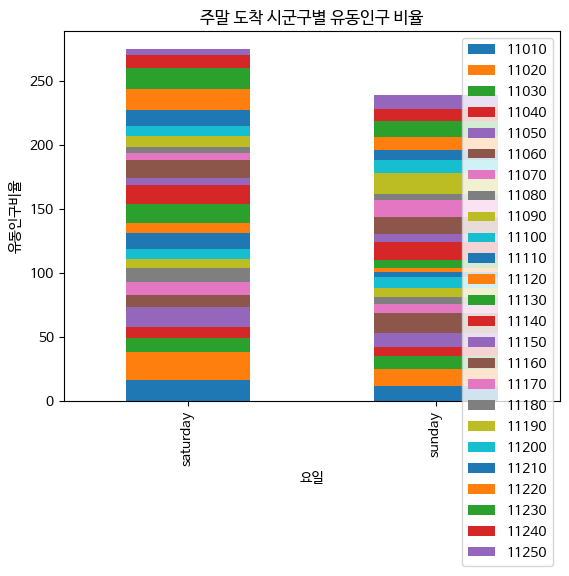

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weekend_data = sms[sms['weekday'].isin(['saturday', 'sunday'])]
grouped_weekend = weekend_data.groupby('weekday')['arrival_code'].value_counts().unstack()
grouped_weekend.plot(kind='bar', stacked=True)
plt.title('주말 도착 시군구별 유동인구 비율')
plt.xlabel('요일')
plt.ylabel('유동인구비율')
plt.legend(title='도착 시군구 코드')
plt.legend(loc='upper right')
plt.show()

# y값 순서대로 정렬 plt

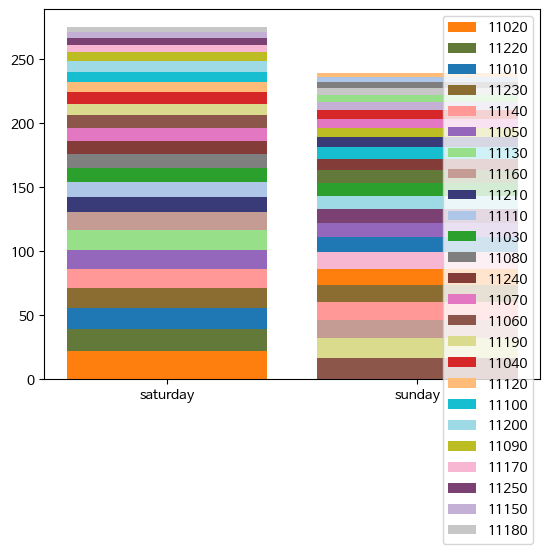

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

weekend_data = sms[sms['weekday'].isin(['saturday', 'sunday'])]
grouped_weekend = weekend_data.groupby('weekday')['arrival_code'].value_counts().unstack()
a=grouped_weekend
fig, ax = plt.subplots()
x = a.index
indexes = np.argsort(a.values).T
heights = np.sort(a.values).T
order = -1
bottoms = heights[::order].cumsum(axis=0)
bottoms = np.insert(bottoms, 0, np.zeros(len(bottoms[0])), axis=0)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#637939', '#8c6d31', '#843c39', '#7b4173']

# 색상 순환 설정
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

mpp_colors = dict(zip(a.columns, plt.rcParams['axes.prop_cycle'].by_key()['color']))

for btms, (idxs, vals) in enumerate(list(zip(indexes, heights))[::order]):
    mps = np.take(np.array(a.columns), idxs)

    ax.bar(x, height=vals, bottom=bottoms[btms], color=[mpp_colors[m] for m in mps])
#ax.set_ylim(bottom=0, top=2)
plt.legend((np.take(np.array(a.columns), np.argsort(a.values)[0]))[::order], loc='upper right')



# Plotly

In [ ]:
import plotly.graph_objects as go
import plotly.colors as pc
import plotly.express as px

data = []


weekend_data = sms[sms['weekday'].isin(['saturday', 'sunday'])]
grouped_weekend = weekend_data.groupby('weekday')['arrival_code'].value_counts().unstack()
df = grouped_weekend



color_map = px.colors.qualitative.Light24
color_map += color_map
mpp_colors = dict(zip(df.columns, color_map))


for i in range(df.shape[0]):
    ordered_columns = df.columns[1:][np.argsort(df.iloc[i, 1:].values)]
    ordered_columns = ordered_columns[::-1]
    for column in ordered_columns:

        data.append(go.Bar(x=[df.index[i]],
                           y=[df[column][i]],
                           marker=dict(color=mpp_colors[int(column)]),
                           name=column,
                           legendgroup=column,showlegend=i == 0))

layout = dict(barmode='stack',
              yaxis={'title': 'amount'},
              xaxis={'type': 'category', 'title': 'month'})
fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    title={
        'text': '<b>주말 도착 시군구별 유동인구 비율</b>',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(
            family="Arial, sans-serif",
            color="black",
            size=20
        )
    },
        width=500,
    height=500,

)
fig.show()